#  Driving Licenses, Traffic Accidents and Casualties Analysis

## Problem Statment

Unfortunatly, traffic accidents are very common in Saudi Arabia and causes many fatalities and injuries. Huge efforts been taken by Saudi government to reduce those accidents to provide safer environment and minimize the losses. in this project we are going to investigate and analyze given data to find out the main factors and impacts to be considered for any corrective actions.

## Executive Summary

the goal of this project is to find out the relation between traffic accident versus driving license and the degree of the impact as well .the analysis shows many findings, the keys finding are :-

1. The number of driving licenses increased in 2017 while the number of accidents decreased in the same year(inversal related) which is logice and make sence. 

2. the number of traffic accsident in Macca increased in 2017 by 20% comparig with them in 2016. the reason is clearly becaus number of pilgrims which also increased in same period.  

### Contents:
- [Datasets Description](#Datasets-Description)
- [Data Import & Cleaning](#Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here, including any Jupyter magic commands*

In [241]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

#Setting display format to retina in matplotlib to see better quality images.
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

## Datasets Description

[Driving Licenses](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-driving-licenses-issued-in-the-kingdom-2004-2008/information/?disjunctive.administritive_area&sort=time_period&location=5,24.37495,45.08024&basemap=jawg.streets)
This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2016. Data from General Authority for Statistics . Follow datasource.kapsarc.org for timely data to advance energy economics research.

[Traffic Accidents and Casualties](https://datasource.kapsarc.org/explore/dataset/saudi-arabia-traffic-accidents-and-casualties-injured-dead-2008/export/?disjunctive.region&disjunctive.indicator&sort=time_period)
This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2016. Data from General Authority for Statistics. Follow datasource.kapsarc.org for timely data to advance energy economics research.


## Data Import and Cleaning

#### 1. Read In Driving Licenses & Traffic Accidents Data
Read in the `saudi-arabia-traffic-accidents-2008.csv` and `saudi-arabia-driving-licenses-2004-2008.csv` files and assign them to appropriately named pandas dataframes.

In [2]:
#Code 
saudi_traffic = pd.read_csv('saudi-arabia-traffic-accidents-2008.csv',delimiter = ';')
saudi_drivlicenses = pd.read_csv('saudi-arabia-driving-licenses-2004-2008.csv',delimiter = ';')

In [3]:
saudi_traffic= saudi_traffic.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1);
saudi_drivlicenses=saudi_drivlicenses.drop(['Unnamed: 0'],axis=1)

#### 2. Display data

Print the first 10 rows of each dataframe to your jupyter notebook

In [4]:
#Code
saudi_traffic[:10]

,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383n,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113n,"23.2883307307, 50.1478302439"
2,(2016),Tabouk,No. of Casualties - Dead,434n,"27.90165499, 37.2598581394"
3,(2016),Hail,No. of Casualties - Dead,299n,"27.400845724, 41.4406960508"
4,(2016),Hail,No. of Accidents,10199n,"27.400845724, 41.4406960508"
5,(2016),Northern Boarder,No. of Casualties - Dead,193n,"30.197074783, 41.8171186952"
6,(2017),Jazan,No. of Accidents,22161n,"17.2072313962, 42.6525807422"
7,(2017),Al-Jouf,No. of Accidents,10469n,"29.9677445762, 39.5570371172"
8,(2017),Total,No. of Casualties - Dead,7489n,NaN
9,(2016),Northern Boarder,No. of Casualties - Injured,631n,"30.197074783, 41.8171186952"


In [5]:
saudi_drivlicenses[:10]

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954n,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349n,"21.628962766, 41.2636898334"
2,(1998),Makkah,86082n,"21.628962766, 41.2636898334"
3,(2004),Makkah,86636n,"21.628962766, 41.2636898334"
4,(2005),Makkah,65099n,"21.628962766, 41.2636898334"
5,(2008),Makkah,77013n,"21.628962766, 41.2636898334"
6,(2014),Madinah,31447n,"24.927534539, 39.4918237173"
7,(2013),Madinah,28513n,"24.927534539, 39.4918237173"
8,(2012),Madinah,14459n,"24.927534539, 39.4918237173"
9,(1994),Madinah,3767n,"24.927534539, 39.4918237173"


#### 3. Briefly describe the data

Take your time looking through the data and briefly describe the data in the markdown cell below. Note things about what the columns might mean, and the general information that is conveyed in the dataframe.

Answer:
#### - Driving Licenses This dataset contains Saudi Arabia Driving Licenses Issued By Administrative Area for 1993 - 2017
- year is The year where the driver's license was issued and Accidents happen
- Administritive Area is the region for each driving licenses was issued and Accidents happen
- driving_license is Number of driving licenses issued per region per year
- geo_point_2d is Region location coordinates
#### - Traffic Accidents and Casualties This dataset contains Saudi Arabia Traffic Accidents and Casualties by Region for 2017
- year is The year where the driver's license was issued and Accidents happen
- region the region for each driving licenses was issued and Accidents happen
- indicator is Describe incidents
- value is Number of injuries, deaths and accidents
- geo_point_2d is Region location coordinates

#### 4a. How complete is the data?

Investigate missing values etc.

In [6]:
#Code
saudi_traffic.isnull().sum()

Year            0
Region          0
Indicator       0
Value           0
geo_point_2d    6
dtype: int64

In [7]:
saudi_drivlicenses.isnull().sum()

Year                    0
Administritive Area     0
Driving Liceses         0
geo_point_2d           25
dtype: int64

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each dataset? What is the maximum *possible* value?**

In [8]:
#Code
saudi_traffic.describe()

,Year,Region,Indicator,Value,geo_point_2d
count,84,84,84,84,78
unique,2,14,3,84,13
top,(2017),Riyadh,No. of Casualties - Injured,194n,"21.628962766, 41.2636898334"
freq,42,6,28,1,6


In [9]:
saudi_drivlicenses.describe()

,Year,Administritive Area,Driving Liceses,geo_point_2d
count,350,350,350,325
unique,25,14,350,13
top,(2002),Eastern,3616n,"18.4511003068, 46.8688495726"
freq,14,25,1,25


#### 5. What are your data types? 
Display the data types of each feature. 

In [10]:
#code
saudi_traffic.dtypes

Year            object
Region          object
Indicator       object
Value           object
geo_point_2d    object
dtype: object

In [11]:
saudi_drivlicenses.dtypes

Year                   object
Administritive Area    object
Driving Liceses        object
geo_point_2d           object
dtype: object

What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

Answer:
year , Driving Liceses and value is should be integr
geo_point_2d is should be float

#### 6. Fix incorrect data types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert numerical columns to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [12]:
#code
saudi_traffic['Value']=saudi_traffic.Value.apply(lambda x : x.replace('n',''))
saudi_traffic.head(2)

,Year,Region,Indicator,Value,geo_point_2d
0,(2016),Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334"
1,(2016),Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439"


In [13]:
saudi_traffic['Value']=pd.to_numeric(saudi_traffic.Value)
saudi_traffic.Value.dtypes

dtype('int64')

In [14]:
saudi_drivlicenses['Driving Liceses']=saudi_drivlicenses['Driving Liceses'].apply(lambda x : x.replace('n',''))
saudi_drivlicenses.head(2)

,Year,Administritive Area,Driving Liceses,geo_point_2d
0,(2012),Makkah,143954,"21.628962766, 41.2636898334"
1,(1994),Makkah,75349,"21.628962766, 41.2636898334"


In [15]:
saudi_drivlicenses['Driving Liceses']=pd.to_numeric(saudi_drivlicenses['Driving Liceses'])
saudi_drivlicenses['Driving Liceses'].dtypes

dtype('int64')

- Make new columns `x` and `y` using `geo_point_2d`

In [16]:
saudi_traffic.geo_point_2d.dtypes

dtype('O')

In [17]:
#code
saudi_traffic['x'] = saudi_traffic['geo_point_2d'].apply(lambda x: str(x).split(',')[-1])
saudi_traffic['y'] = saudi_traffic['geo_point_2d'].apply(lambda x: str(x).split(',')[0])
saudi_traffic[:3]

,Year,Region,Indicator,Value,geo_point_2d,x,y
0,(2016),Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",41.2636898334,21.628962766
1,(2016),Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",50.1478302439,23.2883307307
2,(2016),Tabouk,No. of Casualties - Dead,434,"27.90165499, 37.2598581394",37.2598581394,27.90165499


In [18]:
saudi_drivlicenses['x'] = saudi_drivlicenses['geo_point_2d'].apply(lambda x: str(x).split(',')[-1])
saudi_drivlicenses['y'] = saudi_drivlicenses['geo_point_2d'].apply(lambda x: str(x).split(',')[0])
saudi_drivlicenses[:3]

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,(2012),Makkah,143954,"21.628962766, 41.2636898334",41.2636898334,21.628962766
1,(1994),Makkah,75349,"21.628962766, 41.2636898334",41.2636898334,21.628962766
2,(1998),Makkah,86082,"21.628962766, 41.2636898334",41.2636898334,21.628962766


- Fix any individual values preventing other columns from being the appropriate type.

In [19]:
#code
saudi_drivlicenses.dtypes

Year                   object
Administritive Area    object
Driving Liceses         int64
geo_point_2d           object
x                      object
y                      object
dtype: object

In [20]:
saudi_drivlicenses['Year'] = saudi_drivlicenses['Year'].apply(lambda x: str(x).replace('(',''))
saudi_drivlicenses['Year'] = saudi_drivlicenses['Year'].apply(lambda x: str(x).replace(')',''))
saudi_drivlicenses['Year']=pd.to_numeric(saudi_drivlicenses['Year'])
saudi_drivlicenses[:3]

,Year,Administritive Area,Driving Liceses,geo_point_2d,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",41.2636898334,21.628962766
1,1994,Makkah,75349,"21.628962766, 41.2636898334",41.2636898334,21.628962766
2,1998,Makkah,86082,"21.628962766, 41.2636898334",41.2636898334,21.628962766


In [21]:
saudi_traffic['Year'] = saudi_traffic['Year'].apply(lambda x: str(x).replace('(',''))
saudi_traffic['Year'] = saudi_traffic['Year'].apply(lambda x: str(x).replace(')',''))
saudi_traffic['Year']=pd.to_numeric(saudi_traffic['Year'])

- Finish your data modifications by making sure the columns are now typed appropriately.

In [22]:
#code
#saudi_drivlicenses['geo_point_2d']=pd.to_numeric(saudi_drivlicenses['geo_point_2d'])
saudi_drivlicenses['x']=saudi_drivlicenses['x'].astype(float)
saudi_drivlicenses['y']=saudi_drivlicenses['y'].astype(float)
saudi_traffic['x']=saudi_traffic['x'].astype(float)
saudi_traffic['y']=saudi_traffic['y'].astype(float)

- Display the data types again to confirm they are correct.

In [23]:
#Code:
saudi_drivlicenses.dtypes

Year                     int64
Administritive Area     object
Driving Liceses          int64
geo_point_2d            object
x                      float64
y                      float64
dtype: object

In [24]:
saudi_traffic.dtypes

Year              int64
Region           object
Indicator        object
Value             int64
geo_point_2d     object
x               float64
y               float64
dtype: object

#### 7. Rename columns
Change the names of the columns to more expressive names so that you can tell the difference the Driving Licenses  columns and the & Traffic Accidents columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these two datasets, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).
- Please also fix any typos you see in the column names.

In [25]:
#code
saudi_drivlicenses=saudi_drivlicenses.rename(columns={'Year':'year',
                                   'Administritive Area':'region',
                                   'Driving Liceses':'driving_license'})
                                  
saudi_traffic=saudi_traffic.rename(columns={'Year':'year',
                              'Region':'region',
                              'Indicator':'indicator',
                              'Value':'value'})
saudi_traffic[:2]

,year,region,indicator,value,geo_point_2d,x,y
0,2016,Makkah,No. of Casualties - Injured,12383,"21.628962766, 41.2636898334",41.26369,21.628963
1,2016,Eastern Region,No. of Casualties - Dead,1113,"23.2883307307, 50.1478302439",50.14783,23.288331


In [26]:
saudi_drivlicenses[:2]

,year,region,driving_license,geo_point_2d,x,y
0,2012,Makkah,143954,"21.628962766, 41.2636898334",41.26369,21.628963
1,1994,Makkah,75349,"21.628962766, 41.2636898334",41.26369,21.628963


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|column name|int/float/object|Driving_Licenses/Traffic_Accidents|This is an example| 


|Feature |  Type  | Dataset | Description |
|---|---|---|---|
|year|integr|Driving_Licenses & Traffic_Accidents|The year where the driver's license was issued and Accidents happen|
|region|string|Driving_Licenses & Traffic_Accidents|the region for each driving licenses was issued and Accidents happen|
|driving_license|intger|saudi_drivlicenses|Number of driving licenses issued per region per year|
|indicator|string| Traffic_Accidents | Describe incidents |
|value|integr| Traffic_Accidents | Number of injuries, deaths and accidents |
|  geo_point_2d  | string | Driving_Licenses & Traffic_Accidents |Region location coordinates |
|x| float | Driving_Licenses & Traffic_Accidents | x coordinates for region |
|y| float | Driving_Licenses & Traffic_Accidents | y coordinates for region |

#### 9. Drop unnecessary rows

This study concerns accident and license in regions/area. Please do the followings:
0. Which rows are not associated with regions?
1. Confirm the numbers of all regions add up to total.
2. Remove the rows that are not associated with regions

In [27]:
saudi_traffic.region.unique()

array(['Makkah', 'Eastern Region', 'Tabouk', 'Hail', 'Northern Boarder',
       'Jazan', 'Al-Jouf', 'Total', 'Al-Baaha', 'Riyadh', 'Madinah',
       'Qassim', 'Najran', 'Asir'], dtype=object)

In [28]:
saudi_drivlicenses.region.unique()

array(['Makkah', 'Madinah', 'Al-Qaseem', 'Eastern', 'Assir', 'Tabouk',
       'Hail', 'Northern Boarder', 'Jazan', 'Najran', 'Al-Baha',
       'Al-Jouf', 'Total', 'Riyadh'], dtype=object)

In [29]:
saudi_drivlicenses= saudi_drivlicenses[~saudi_drivlicenses.region.str.contains('Total')]

In [30]:
saudi_traffic= saudi_traffic[~saudi_traffic.region.str.contains('Total')]

In [31]:
saudi_traffic['region']= saudi_traffic.region.replace('Eastern Region','Eastern')
saudi_traffic['region']= saudi_traffic.region.replace('Al-Baaha','Al-Baha')
saudi_traffic['region']= saudi_traffic.region.replace('Qassim','Al-Qaseem')
saudi_traffic['region']= saudi_traffic.region.replace('Asir','Assir')

In [32]:
saudi_traffic.region.unique()

array(['Makkah', 'Eastern', 'Tabouk', 'Hail', 'Northern Boarder', 'Jazan',
       'Al-Jouf', 'Al-Baha', 'Riyadh', 'Madinah', 'Al-Qaseem', 'Najran',
       'Assir'], dtype=object)

In [33]:
#saudi_drivlicenses= saudi_drivlicenses[~saudi_drivlicenses.region.str.contains('Total')]

#### 10a. Data formats
Is the License data in long or wide format? How about the Accident data? And why?

In [34]:
#code
saudi_traffic.shape

(78, 7)

In [35]:
saudi_drivlicenses.shape

(325, 6)

saudi_traffic is long becuse the region and the year is dublecated and the saudi_drivlicenses is wide becuse the region and the year is unique

#### 10b. Changing formats
Which format would work best for both dataframes? Transform the datasets to the same format before merging in the next task.

In [36]:
#code
t = saudi_traffic.pivot_table(index=['year','region'], columns='indicator', values='value')
t

indicator              No. of Accidents  No. of Casualties - Dead  \
year region                                                         
2016 Al-Baha                       3618                       185   
     Al-Jouf                      10212                       245   
     Al-Qaseem                    25664                       397   
     Assir                        32684                       983   
     Eastern                     101619                      1113   
     Hail                         10199                       299   
     Jazan                        25873                       514   
     Madinah                      14475                       822   
     Makkah                      134838                      2243   
     Najran                        3235                       173   
     Northern Boarder             13196                       193   
     Riyadh                      141736                      1430   
     Tabouk                       16031                       434   
2017 Al-Baha                       1414                       134   
     Al-Jouf                      10469                       240   
     Al-Qaseem                    22405                       319   
     Assir                        25245                       828   
     Eastern                      81433                       963   
     Hail                          9379                       265   
     Jazan                        22161                       466   
     Madinah                      16070                       580   
     Makkah                      145541                      1641   
     Najran                        3193                       194   
     Northern Boarder             11540                       112   
     Riyadh                       99925                      1399   
     Tabouk                       11713                       348   

indicator              No. of Casualties - Injured  
year region                                         
2016 Al-Baha                                  1227  
     Al-Jouf                                   920  
     Al-Qaseem                                1513  
     Assir                                    2541  
     Eastern                                  4893  
     Hail                                      932  
     Jazan                                    2259  
     Madinah                                  4184  
     Makkah                                  12383  
     Najran                                    706  
     Northern Boarder                          631  
     Riyadh                                   4207  
     Tabouk                                   1724  
2017 Al-Baha                                  1007  
     Al-Jouf                                   862  
     Al-Qaseem                                1446  
     Assir                                    2368  
     Eastern                                  4073  
     Hail                                      773  
     Jazan                                    2207  
     Madinah                                  2917  
     Makkah                                  10623  
     Najran                                    766  
     Northern Boarder                          374  
     Riyadh                                   4540  
     Tabouk                                   1243

In [175]:
t=t.rename(columns={'No. of Accidents':'num_accidents',
                    'No. of Casualties - Dead':'num_dead',
                    'No. of Casualties - Injured':'num_injured'})

#### 11. Merge dataframes

Join the Driving Licenses & Traffic Accidents dataframes using the **region** and **year** in each dataframe as the key. Assign this to a new variable. Which join should you use to preserve the most data?

In [176]:
#code
join = pd.merge(t,saudi_drivlicenses, how='outer',on=['year','region'])
join[:2]

,year,region,num_accidents,num_dead,num_injured,driving_license,geo_point_2d,x,y
0,2016,Al-Baha,3618.0,185.0,1227.0,4614,"20.1484058503, 41.4665484892",41.466548,20.148406
1,2016,Al-Jouf,10212.0,245.0,920.0,9371,"29.9677445762, 39.5570371172",39.557037,29.967745


#### 12. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_datasets.csv`.

In [177]:
#code
join.to_csv('combined_datasets.csv', header=False, index=False)

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [178]:
#Code:
join.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
year,325.0,2005.000000,7.222222,1993.000000,1999.000000,2005.000000,2011.000000,2017.000000
num_accidents,26.0,38225.692308,46493.705035,1414.000000,10276.250000,16050.500000,30981.250000,145541.000000
num_dead,26.0,635.384615,549.783381,112.000000,241.250000,415.500000,929.250000,2243.000000
num_injured,26.0,2743.038462,2922.641127,374.000000,923.000000,1618.500000,3784.000000,12383.000000
driving_license,325.0,28915.347692,47419.058819,915.000000,4846.000000,10267.000000,25423.000000,495307.000000
x,325.0,42.602789,3.254196,37.259858,41.263690,41.817119,43.343000,50.147830
y,325.0,23.810447,4.197987,17.207231,20.148406,23.288331,27.400846,30.197075


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [40]:
#code
import math
import sys
def std_calc(data):
    n = len(data)
    if n <= 1:
        return 0.0
    mean, sd = avg_calc(data), 0.0
    for el in data:
        sd += (float(el) - mean)**2
    sd = math.sqrt(sd / float(n-1))
    return sd
def avg_calc(ls):
    n, mean = len(ls), 0.0
    if n <= 1:
        return ls[0]
    for el in ls:
        mean = mean + float(el)
    mean = mean / float(n)
    return mean

In [41]:
display(std_calc(join[join['num_dead'].notnull()]['num_dead']))

549.7833811182785

- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'Driving_Licenses_x': 120, 'Traffic_Accidents_x': 120, ...}`

In [76]:
#Code:
display(sd = {'Year':std_calc(list(join['year'])),
              'N_Accidents': std_calc(join['num_accidents'].notnull()),
              'N_Casualties_Dead':std_calc(join['num_dead'].notnull()),
              'N_Casualties_Injured':std_calc(join['num_injured'].notnull()),
              'Driving_License':std_calc(join['driving_license']),
              'x':std_calc(list(join['x'])),
              'y':std_calc(list(join['y']))})
sd

{'Year': 7.222222222222222,
 'Number of Accidents': nan,
 'Number of Casualties Dead': nan,
 'Number of Casualties_Injured': nan,
 'Driving License': 47419.058819359976,
 'x': 3.25419561698234,
 'y': 4.197987443723309}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

Answer:

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)
- Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)
- What are the regions that have more Driving Licenses issued in each year than the year average?
- What are the regions that have more Traffic Accidents happened in each year than the year average?

Based on what you've just observed, have you identified any regions that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [68]:
#Which regions have the highest and lowest Driving Licenses based on years (1993 - 2017)

mask1 = join.mask((1992 < join['year'])&(join['year'] > 2018))

hig_region = mask.loc[mask1['driving_license']== join['driving_license'].max(),'region'].iloc[0]
low_region = mask.loc[mask1['driving_license']== join['driving_license'].min(),'region'].iloc[0]
print(f'Highest Driving Licenses in {hig_region} and the lowest region is {low_region}')


Highest Driving Licenses in Riyadh and the lowest region is Tabouk


In [54]:
mask.describe()

,year,No. of Accidents,No. of Casualties - Dead,No. of Casualties - Injured,driving_license,x,y
count,325.000000,26.000000,26.000000,26.000000,325.000000,325.000000,325.000000
mean,2005.000000,38225.692308,635.384615,2743.038462,28915.347692,42.602789,23.810447
std,7.222222,46493.705035,549.783381,2922.641127,47419.058819,3.254196,4.197987
min,1993.000000,1414.000000,112.000000,374.000000,915.000000,37.259858,17.207231
25%,1999.000000,10276.250000,241.250000,923.000000,4846.000000,41.263690,20.148406
50%,2005.000000,16050.500000,415.500000,1618.500000,10267.000000,41.817119,23.288331
75%,2011.000000,30981.250000,929.250000,3784.000000,25423.000000,43.343000,27.400846
max,2017.000000,145541.000000,2243.000000,12383.000000,495307.000000,50.147830,30.197075


In [73]:
#Which regions have the highest and lowest mean Traffic Accidents numbers for years (2016 - 2017)

mask2 = join.mask((2015 < join['year'])&(join['year'] > 2018))

hig_region2 = mask.loc[mask2['num_accidents']== join['num_accidents'].max(),'region'].iloc[0]
low_region2 = mask.loc[mask2['num_accidents']== join['num_accidents'].min(),'region'].iloc[0]
print(f'Highest Traffic Accidents in {hig_region2} and the Traffic Accidents is {low_region2}')


Highest Traffic Accidents in Makkah and the Traffic Accidents is Al-Baha


In [72]:
#What are the regions that have more Driving Licenses issued in each year than the year average

more_Licenses = join.pivot_table(index=['region'], columns=['year'],values=['driving_license'])
more_Licenses.columns=more_Licenses.columns.get_level_values(1)
result = more_Licenses[(more_accidents > more_Licenses.mean())]
result = result.reset_index()
for i in range(2016,2018):
    c = result[result[i].notnull()]['region']
    print ('In year {} : \n{}'.format(i,c))

In year 2016 : 
4     Eastern
8      Makkah
11     Riyadh
Name: region, dtype: object
In year 2017 : 
4     Eastern
8      Makkah
11     Riyadh
Name: region, dtype: object


In [70]:
#What are the regions that have more Traffic Accidents happened in each year than the year average

more_accidents = join.pivot_table(index=['region'], columns=['year'],values=['num_accidents'])
more_accidents.columns=more_accidents.columns.get_level_values(1)
result = more_accidents[(more_accidents > more_accidents.mean())]
result = result.reset_index()
for i in range(2016,2018):
    c = result[result[i].notnull()]['region']
    print ('In year {} : \n{}'.format(i,c))

In year 2016 : 
4     Eastern
8      Makkah
11     Riyadh
Name: region, dtype: object
In year 2017 : 
4     Eastern
8      Makkah
11     Riyadh
Name: region, dtype: object


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

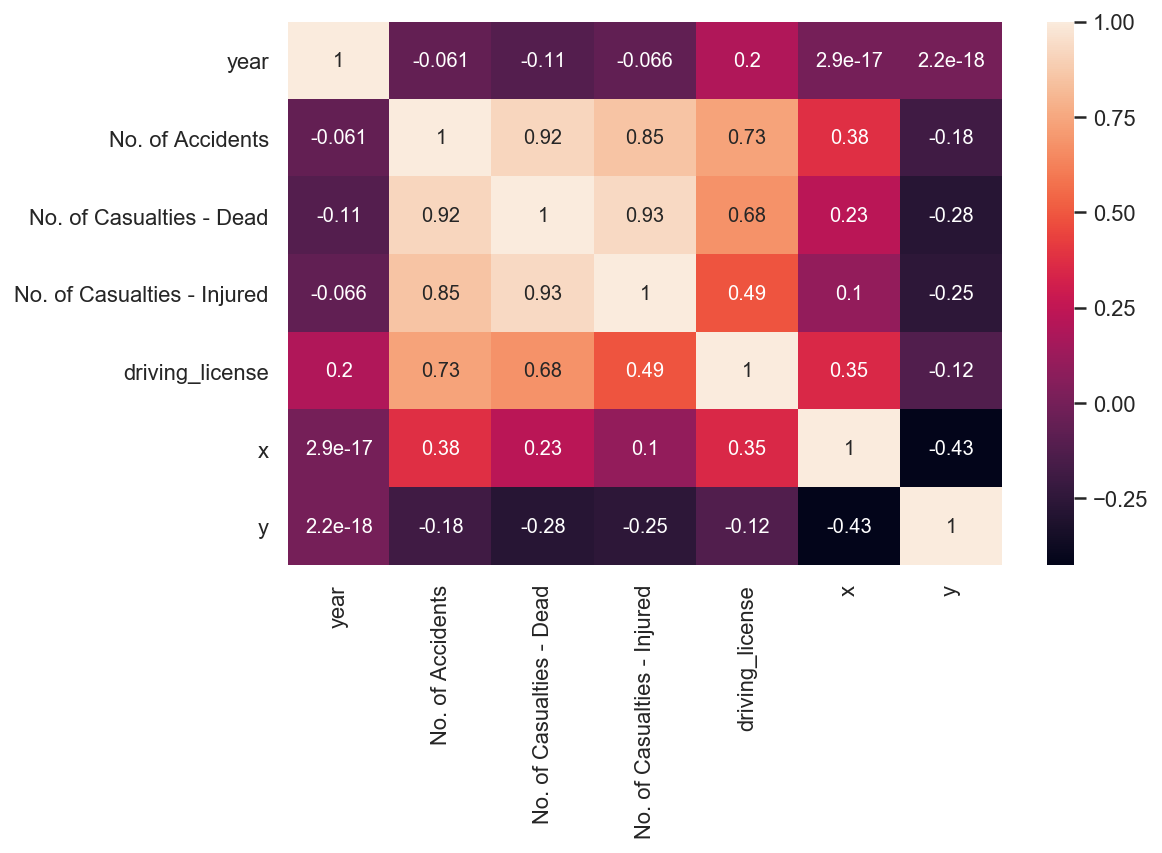

In [172]:
fig, ax = plt.subplots(figsize=(8,5))
sns.heatmap(join.corr(),annot=True,ax=ax)
plt.show()

#### Define a custom function to subplot histograms

We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [207]:
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels):
    nrows = int(np.ceil(len(list_of_columns)/2))  
    fig, ax = plt.subplots(figsize=(14, 6),nrows=nrows, ncols=2)
    ax = ax.ravel() 
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column]) 
        ax [i].set_title(list_of_titles [i])
        ax [i].set_xlabel(list_of_xlabels [i])

#### Plot and interpret histograms 
For each of the following:
- Driving Licenses number
- Traffic Accidents number

Please plot two additional histograms that will help with your understanding of the data

C:\Users\User1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\User1\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


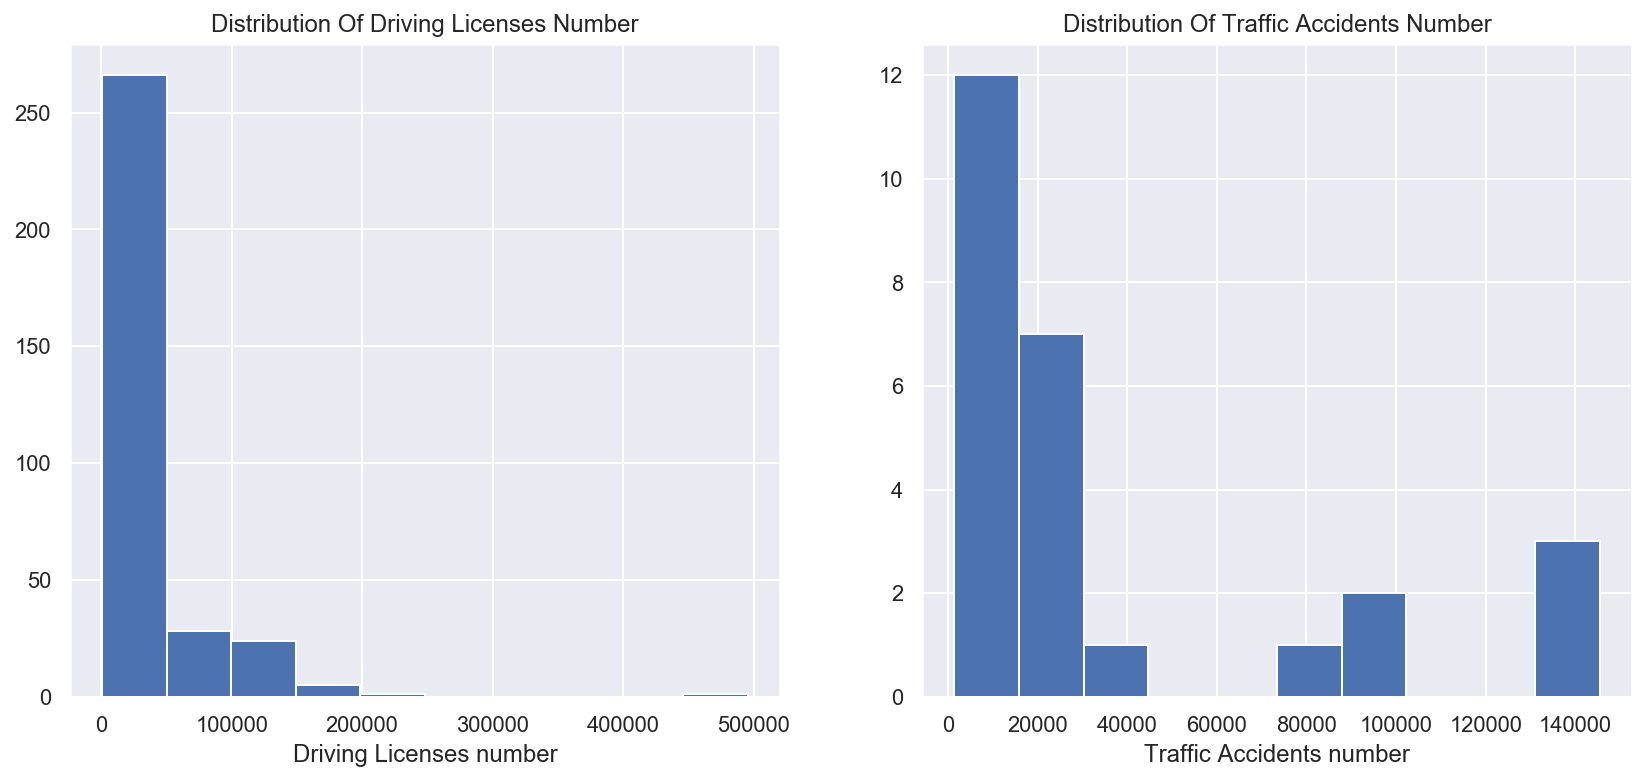

In [242]:
list_of_columns = ['driving_license','num_accidents']
list_of_titles = ['Distribution Of Driving Licenses Number','Distribution Of Traffic Accidents Number']
list_of_xlabels = ['Driving Licenses number','Traffic Accidents number']
subplot_histograms(join, list_of_columns, list_of_titles, list_of_xlabels)

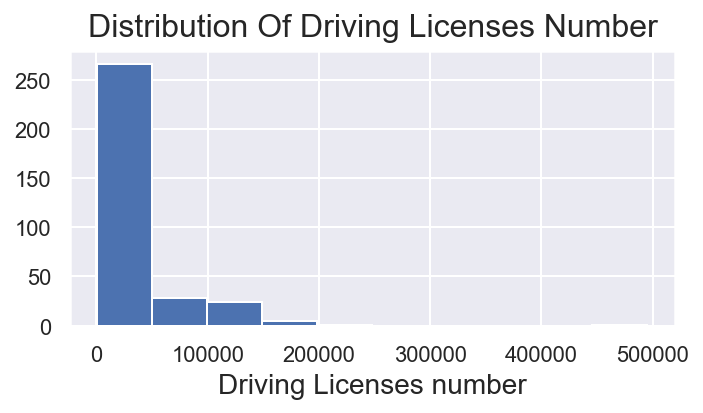

In [243]:
fig = plt.figure(figsize=(5,3))
ax = fig.gca()
join[['driving_license']].hist(bins=10 ,ax=ax)
ax.set_xlabel('Driving Licenses number', fontsize=14);
ax.set_title('Distribution Of Driving Licenses Number', fontsize=16, y=1.01);
plt.tight_layout()

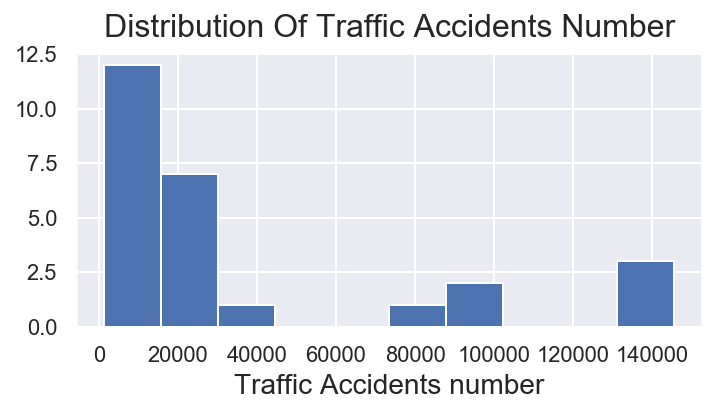

In [244]:
fig = plt.figure(figsize=(5,3))
ax = fig.gca()
join[[ 'num_accidents']].hist(bins=10 ,ax=ax)
ax.set_xlabel('Traffic Accidents number', fontsize=14);
ax.set_title('Distribution Of Traffic Accidents Number', fontsize=16, y=1.01);
plt.tight_layout()

#### Plot and interpret scatter plots

For each of the following:
- Driving Licenses vs. Traffic Accidents for 2017
- Driving Licenses vs. Traffic Accidents for 2016
- Driving Licenses for 2016 vs 2017
- Traffic Accidents for 2016 vs 2017

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


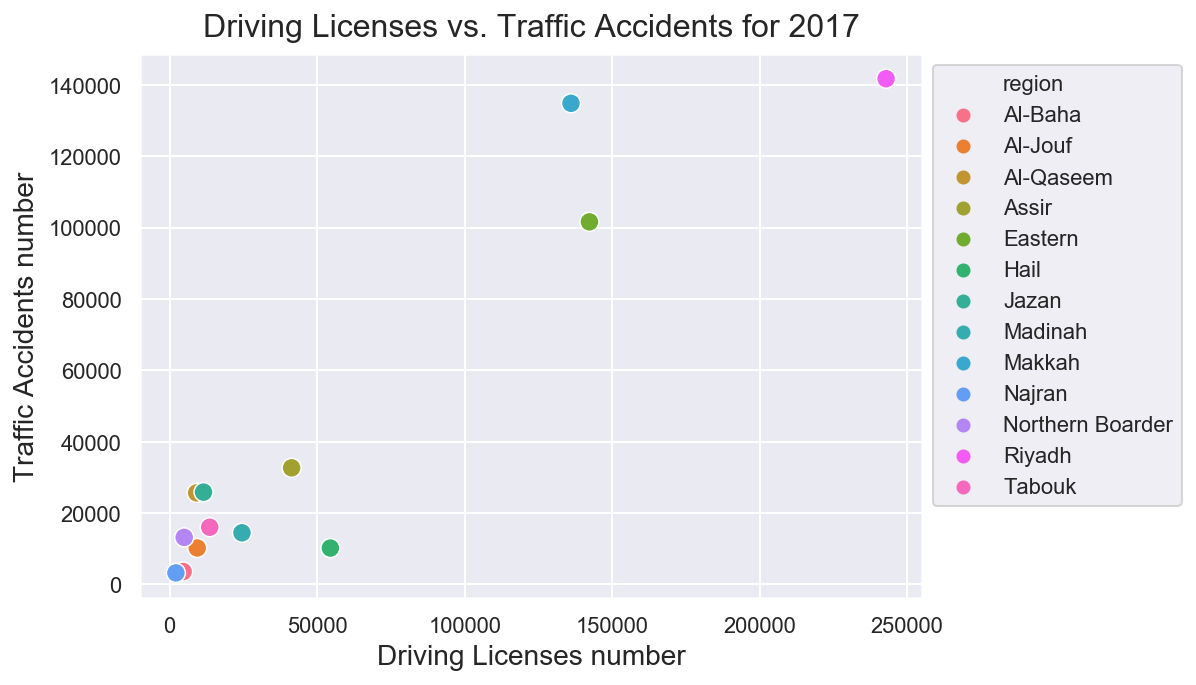

In [370]:

masks=join.mask(join['year']==2017)
fig = plt.figure(figsize=(7,5))
ax = fig.gca()
sns.scatterplot(data=masks ,x='driving_license', y='num_accidents',hue="region", s=90) 
ax.set_ylabel('Traffic Accidents number', fontsize=14);
ax.set_xlabel('Driving Licenses number', fontsize=14);
ax.set_title('Driving Licenses vs. Traffic Accidents for 2017', fontsize=16, y=1.01);
plt.legend(bbox_to_anchor=(1,1), loc=2)

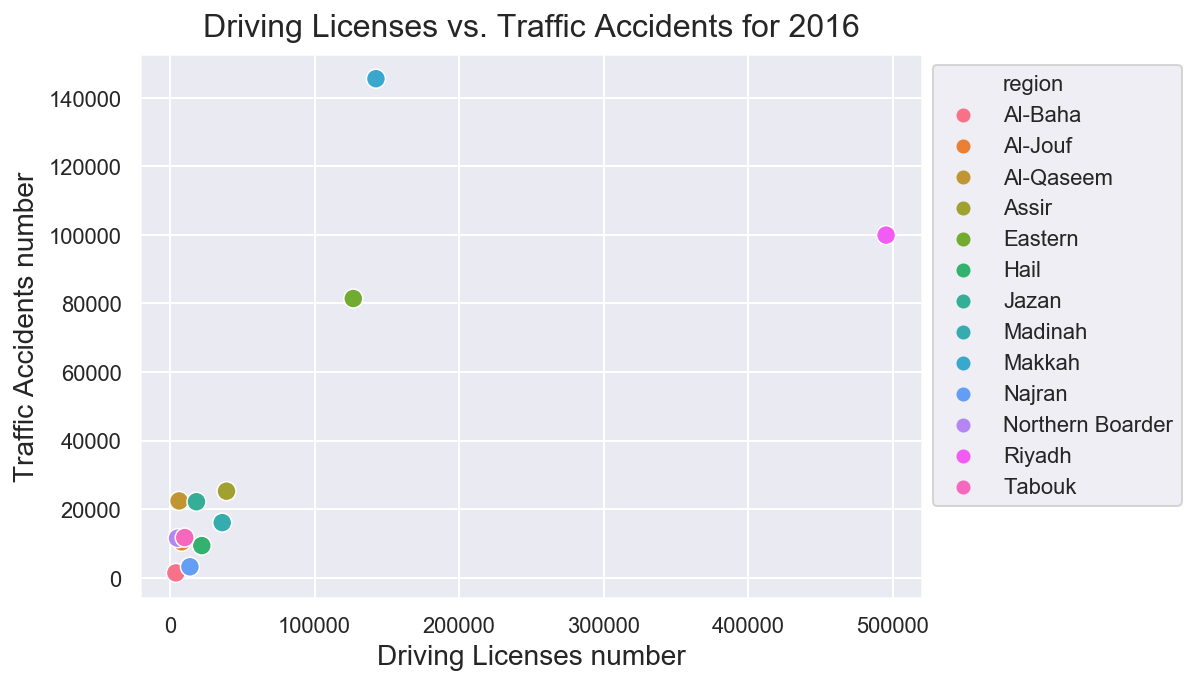

In [369]:

masks=join.mask(join['year']==2016)
fig = plt.figure(figsize=(7,5))
ax = fig.gca()
sns.scatterplot(data=masks ,x='driving_license', y='num_accidents',hue="region", s=90) 
ax.set_ylabel('Traffic Accidents number', fontsize=14);
ax.set_xlabel('Driving Licenses number', fontsize=14);
ax.set_title('Driving Licenses vs. Traffic Accidents for 2016', fontsize=16, y=1.01);
plt.legend(bbox_to_anchor=(1,1), loc=2)

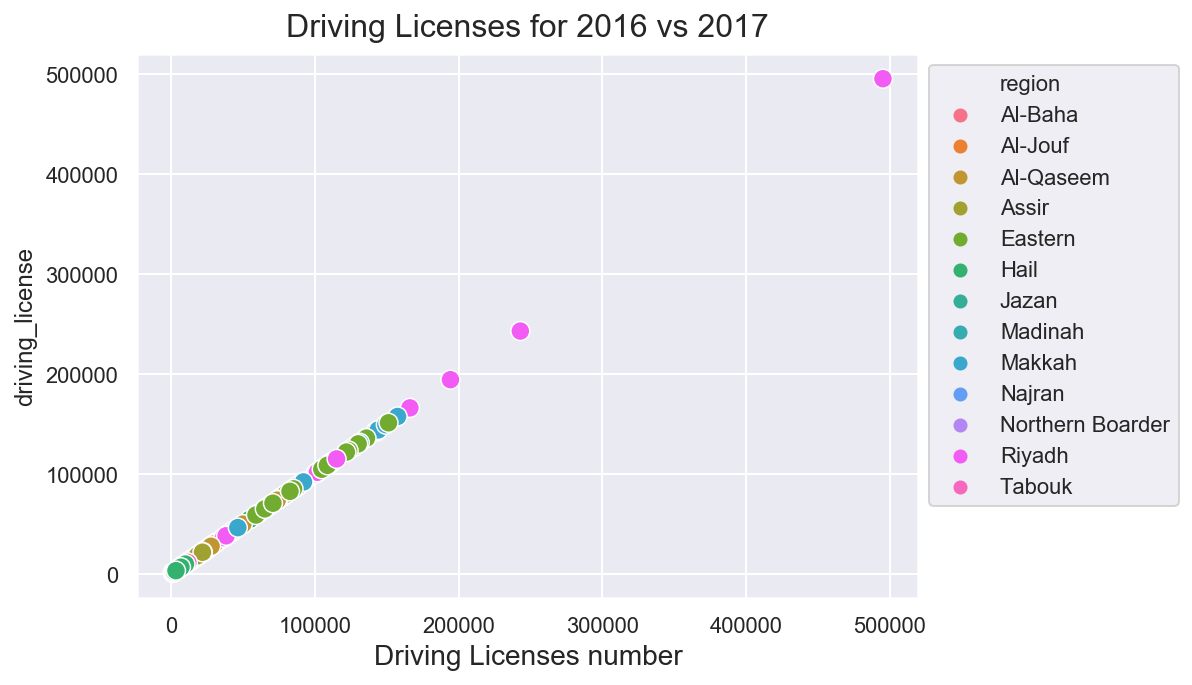

In [368]:

masks=join.mask((2015 < join['year'])&(join['year'] > 2018))
fig = plt.figure(figsize=(7,5))
ax = fig.gca()
sns.scatterplot(data=masks ,x='driving_license', y='driving_license',hue="region", s=90) 
ax.set_xlabel('Driving Licenses number', fontsize=14);
ax.set_title('Driving Licenses for 2016 vs 2017', fontsize=16, y=1.01);
plt.legend(bbox_to_anchor=(1,1), loc=2)

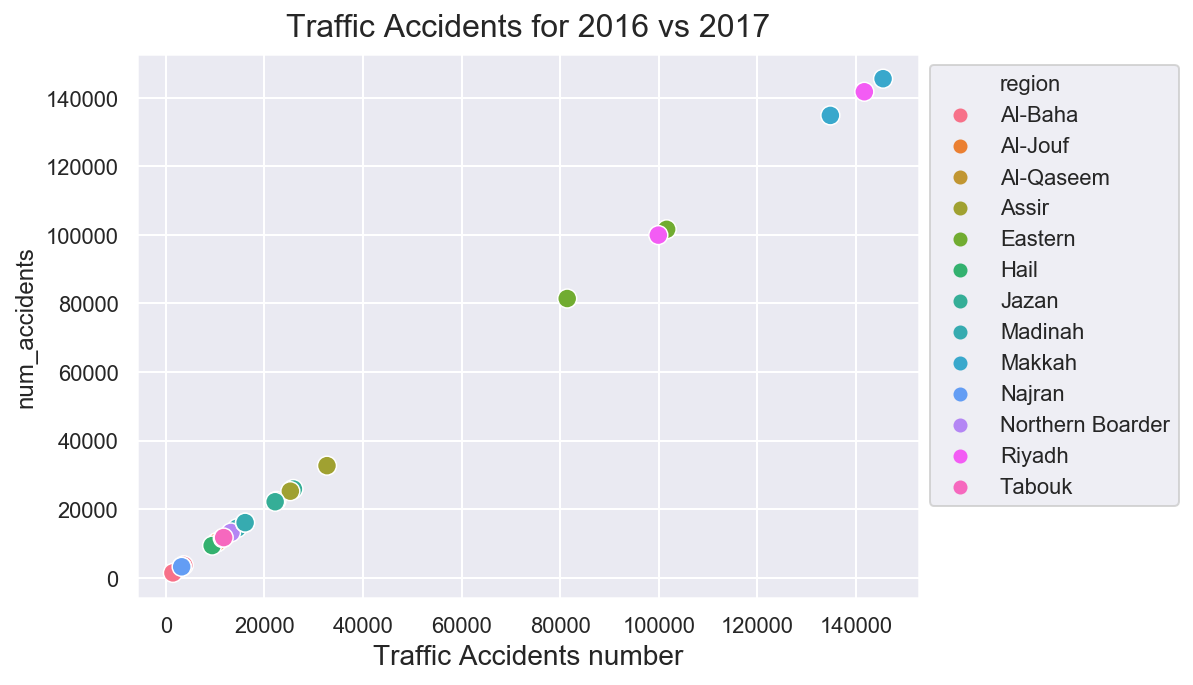

In [367]:
fig = plt.figure(figsize=(7,5))
ax = fig.gca()
sns.scatterplot(data=masks ,x='num_accidents', y='num_accidents',hue="region", s=90) 
ax.set_xlabel('Traffic Accidents number', fontsize=14);
ax.set_title('Traffic Accidents for 2016 vs 2017', fontsize=16, y=1.01);
plt.legend(bbox_to_anchor=(1,1), loc=2)

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

Text(0.5, 1.01, 'Box Plot for Traffic Accidents & Driving Licenses')

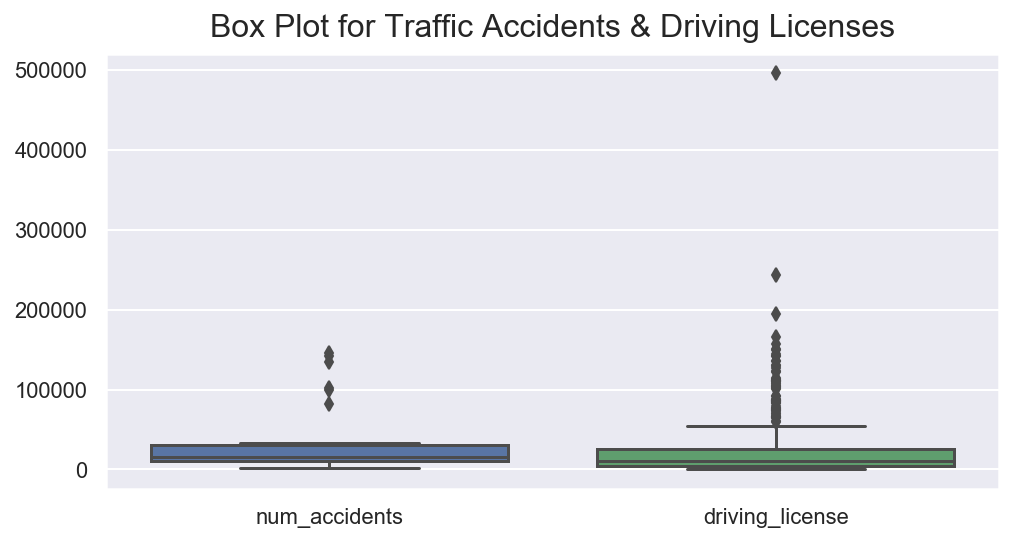

In [302]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
a=join[['num_accidents','driving_license']]
sns.boxplot( palette=['b','g'], data=a)
ax.set_title('Box Plot for Traffic Accidents & Driving Licenses', fontsize=16, y=1.01)

Text(0.5, 1.01, 'Box Plot for Casualties Injured & Casualties Dead')

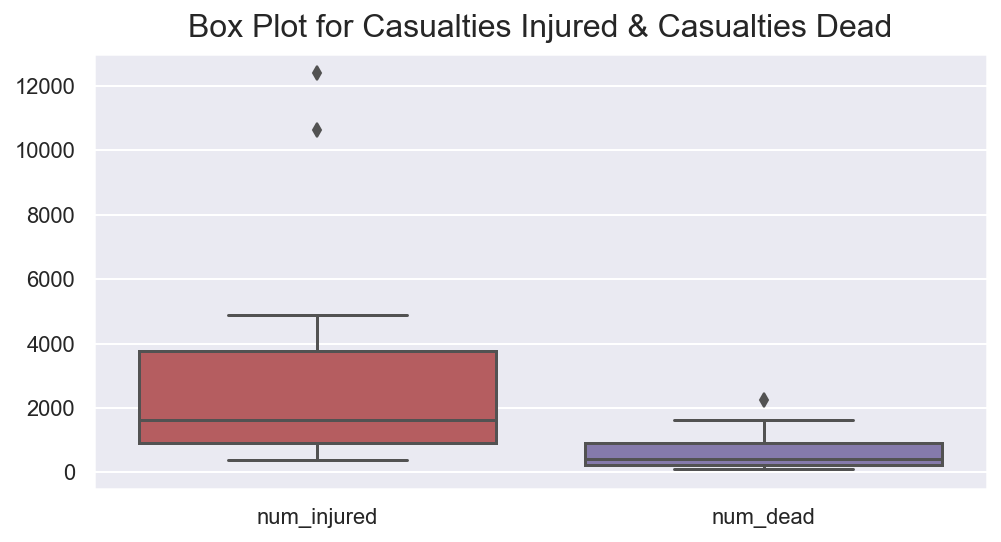

In [305]:
fig = plt.figure(figsize=(8,4))
ax = fig.gca()
a=join[['num_injured','num_dead']]
sns.boxplot( palette=['r','m'], data=a)
ax.set_title('Box Plot for Casualties Injured & Casualties Dead', fontsize=16, y=1.01)

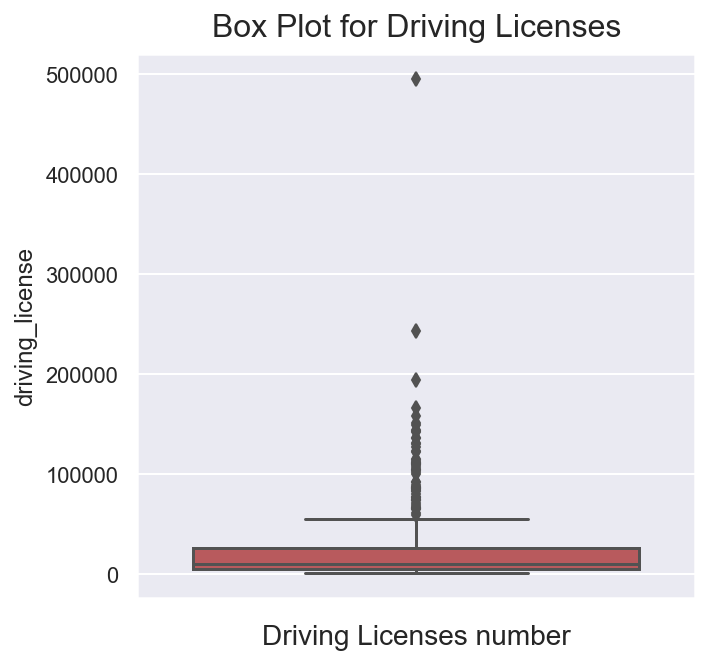

In [252]:
fig = plt.figure(figsize=(5, 5))
ax = fig.gca()
sns.boxplot(data=join,x='driving_license' ,orient='v',saturation=0.8,palette=['r'])
ax.set_xlabel('Driving Licenses number', fontsize=14);
ax.set_title('Box Plot for Driving Licenses', fontsize=16, y=1.01);

#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

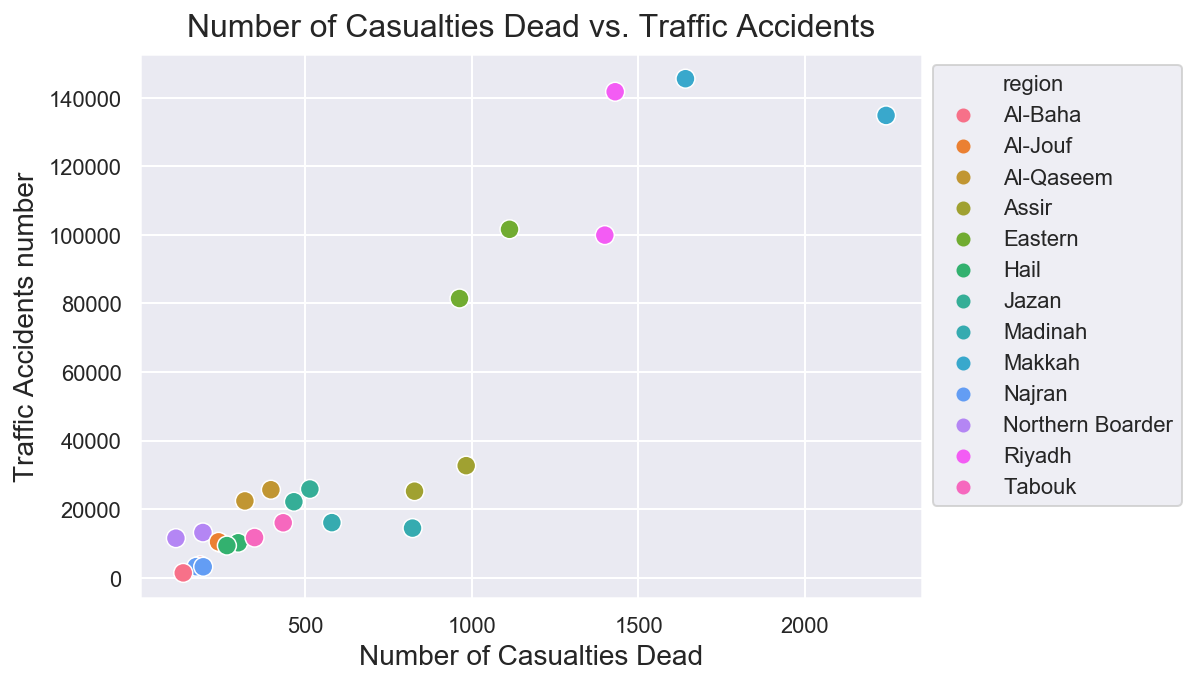

In [366]:
fig = plt.figure(figsize=(7,5))
ax = fig.gca()
sns.scatterplot(data=join ,x='num_dead', y='num_accidents',hue="region", s=90) 
ax.set_ylabel('Traffic Accidents number', fontsize=14);
ax.set_xlabel('Number of Casualties Dead', fontsize=14);
ax.set_title('Number of Casualties Dead vs. Traffic Accidents', fontsize=16, y=1.01);
plt.legend(bbox_to_anchor=(1,1), loc=2)

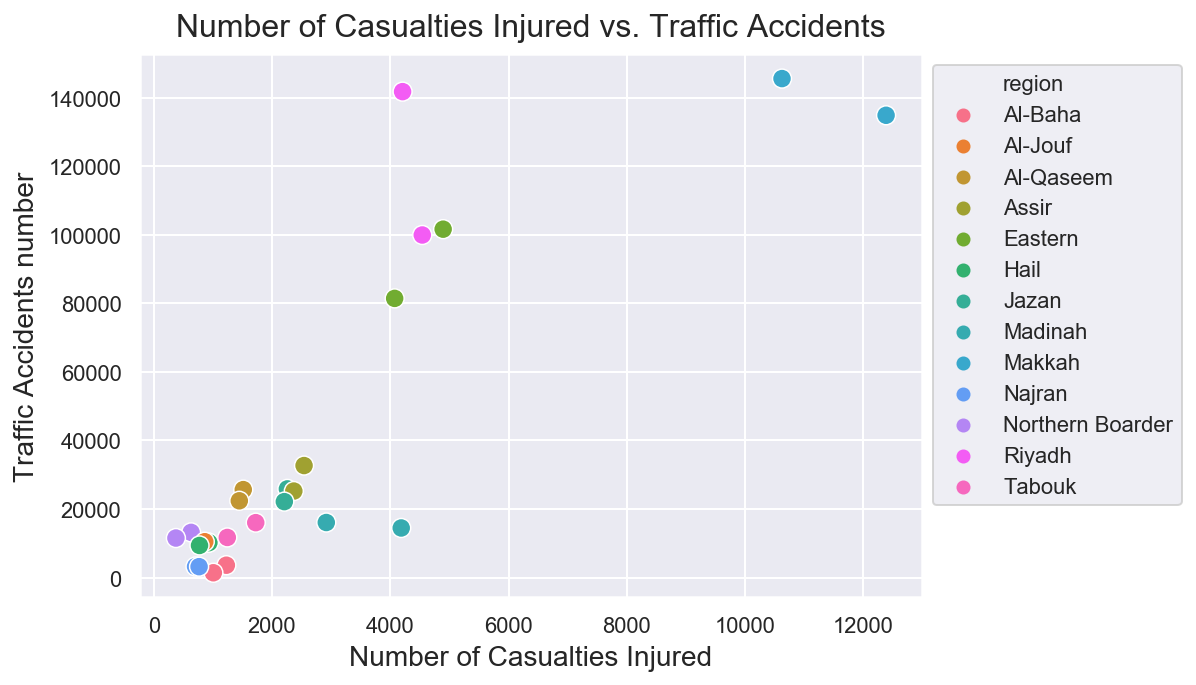

In [365]:
fig = plt.figure(figsize=(7,5))
ax = fig.gca()
sns.scatterplot(data=join ,x='num_injured', y='num_accidents',hue="region", s=90) 
ax.set_ylabel('Traffic Accidents number', fontsize=14);
ax.set_xlabel('Number of Casualties Injured', fontsize=14);
ax.set_title('Number of Casualties Injured vs. Traffic Accidents', fontsize=16, y=1.01);
plt.legend(bbox_to_anchor=(1,1), loc=2)

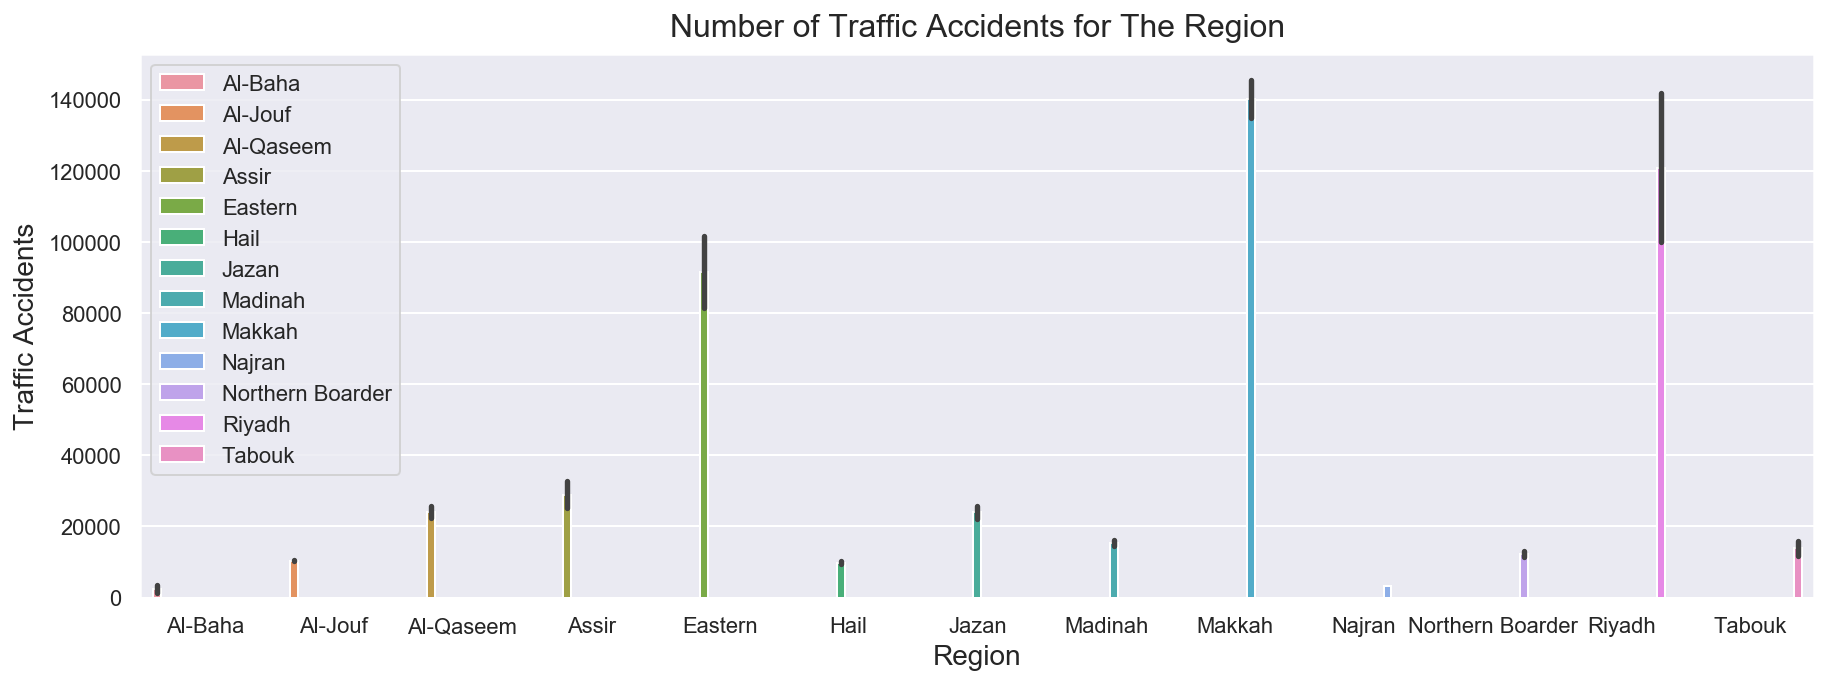

In [352]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
sns.barplot(data=join,x='region', y='num_accidents',hue='region')
ax.set_ylabel('Traffic Accidents', fontsize=14);
ax.set_xlabel('Region', fontsize=14);
ax.set_title('Number of Traffic Accidents for The Region', fontsize=16, y=1.01);
ax.legend(loc=2);

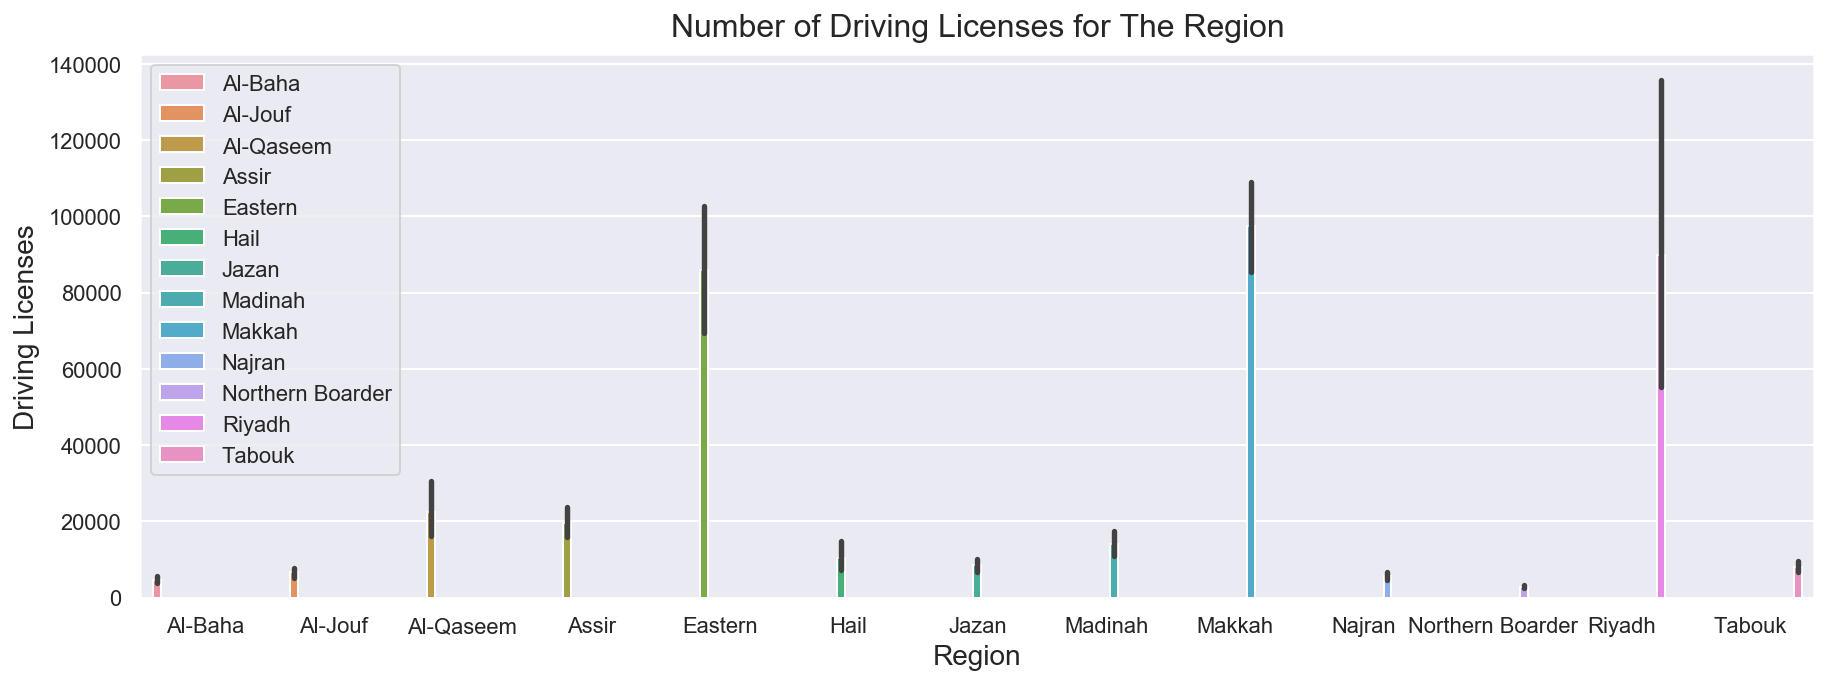

In [353]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
sns.barplot(data=join,x='region', y='driving_license',hue='region')
ax.set_ylabel('Driving Licenses', fontsize=14);
ax.set_xlabel('Region', fontsize=14);
ax.set_title('Number of Driving Licenses for The Region', fontsize=16, y=1.01);
ax.legend(loc=2);

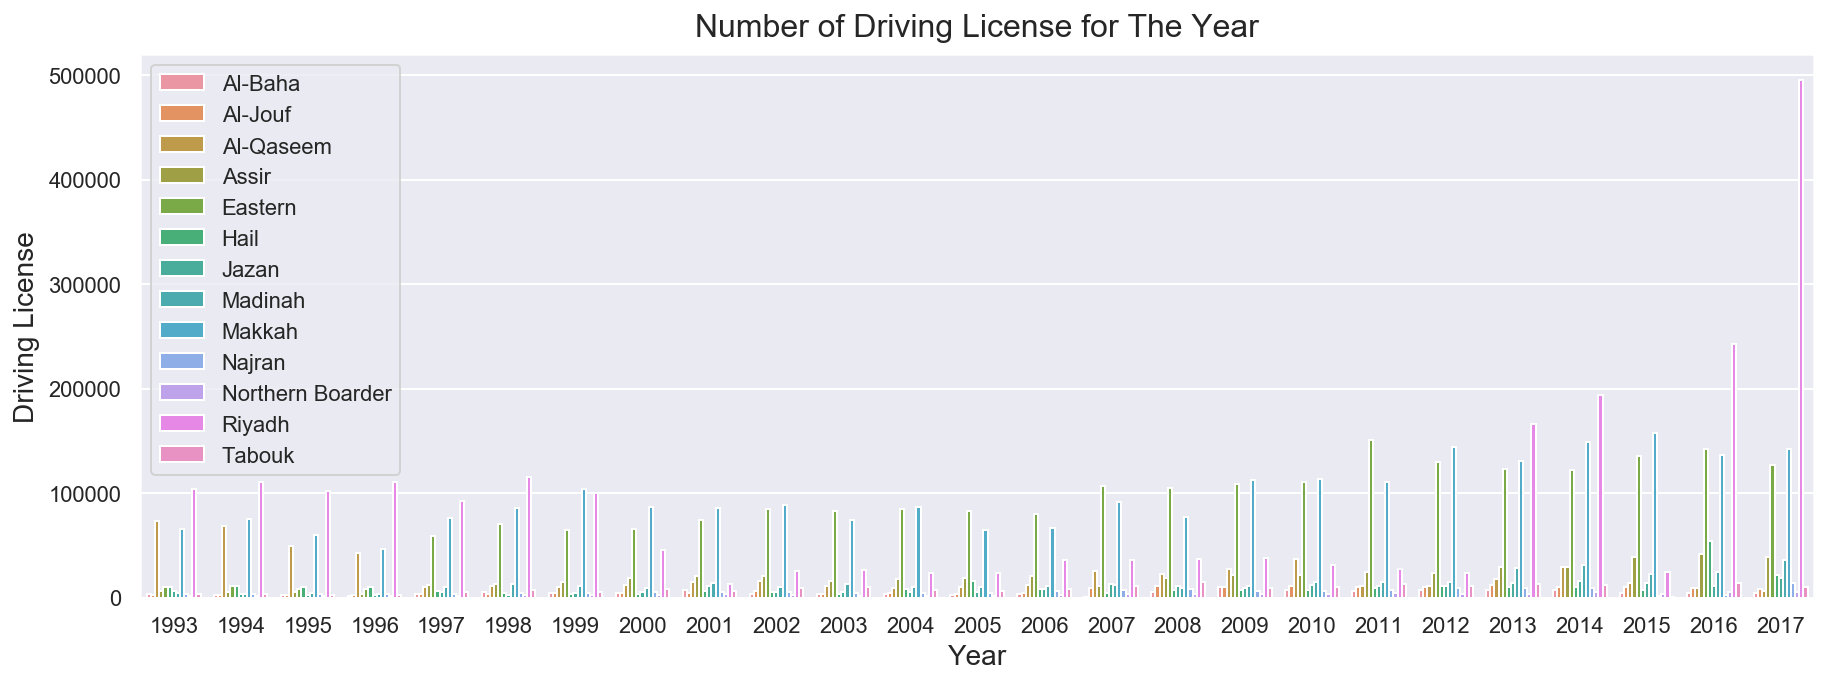

In [354]:
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
sns.barplot(data=join,x='year', y='driving_license',hue='region')
ax.set_ylabel('Driving License', fontsize=14);
ax.set_xlabel('Year', fontsize=14);
ax.set_title('Number of Driving License for The Year', fontsize=16, y=1.01);
ax.legend(loc=2);

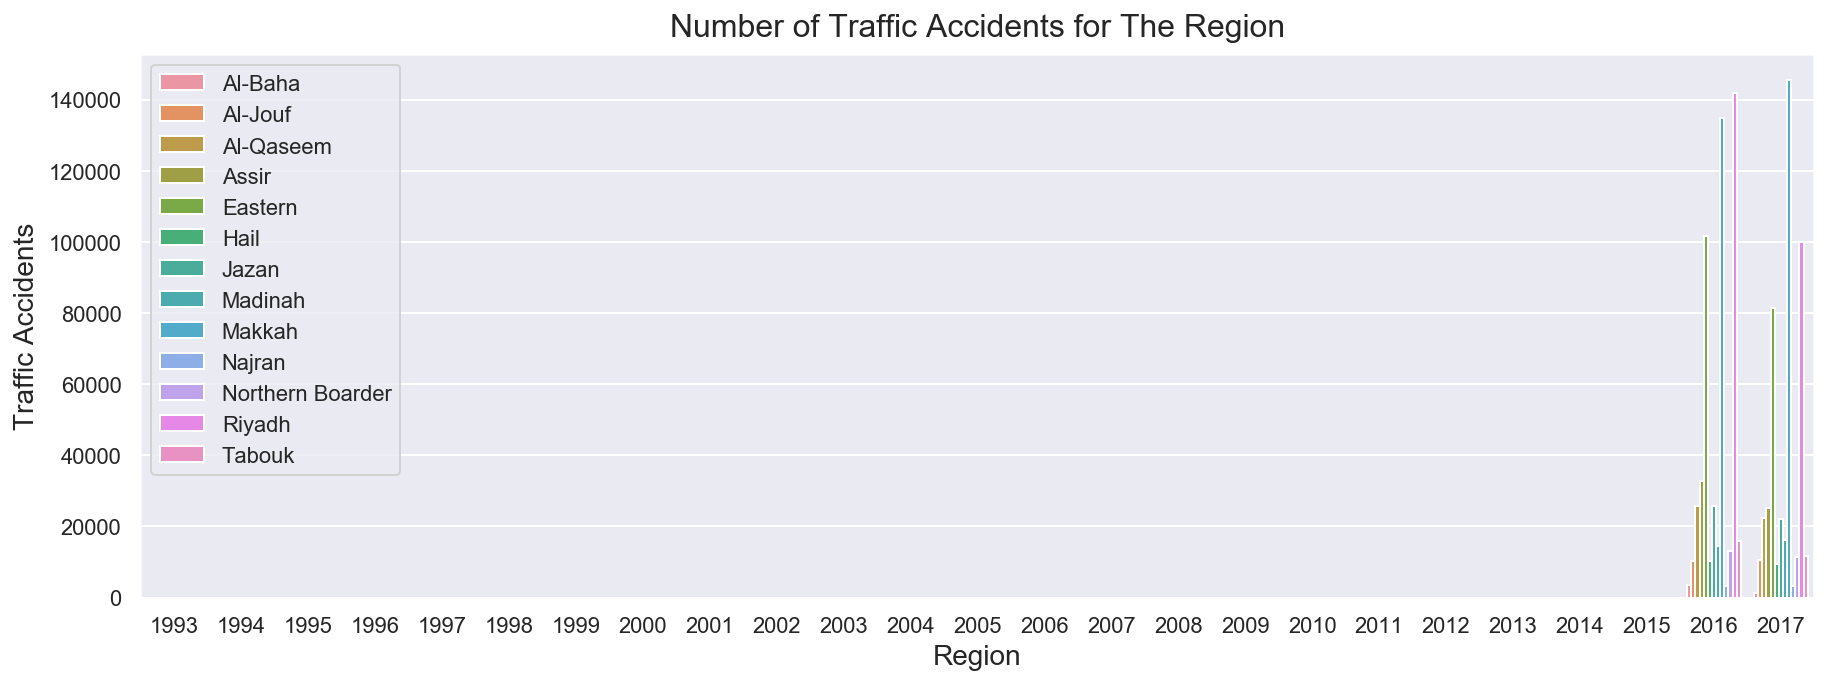

In [373]:
maskr=join.mask((2015 < join['year'])&(join['year'] > 2018))
fig = plt.figure(figsize=(15,5))
ax = fig.gca()
sns.barplot(data=maskr,x='year', y='num_accidents',hue='region')
ax.set_ylabel('Traffic Accidents', fontsize=14);
ax.set_xlabel('Region', fontsize=14);
ax.set_title('Number of Traffic Accidents for The Region', fontsize=16, y=1.01);
ax.legend(loc=2);

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [268]:
from scipy import stats

stats.mode(join['num_accidents'])

ModeResult(mode=array([1414.]), count=array([1]))

In [270]:
np.mean(join['num_accidents'])

38225.692307692305

In [274]:
np.median(join['num_accidents'].dropna())

16050.5

In [275]:
stats.mode(join['driving_license'])

ModeResult(mode=array([915], dtype=int64), count=array([1]))

In [276]:
np.mean(join['driving_license'])

28915.347692307692

In [277]:
np.median(join['driving_license'].dropna())

10267.0

In [341]:
#Traffic Accidents
rang_t = np.ptp(join['num_accidents'])
var_t = np.var(join['num_accidents'])
std_t = np.std(join['num_accidents'])
rang_t , var_t ,std_t

C:\Users\User1\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


(144127.0, 2078523661.4437866, 45590.82869880505)

In [342]:
#Driving Licenses
rang_l = np.ptp(join['driving_license'])
var_l = np.var(join['driving_license'])
std_l = np.std(join['driving_license'])
rang_l, var_l ,std_l

(494392, 2241648471.192955, 47346.05021744638)

Answers:
- Range shows how widely the numbers in a set vary huge and also the variance so it is can’t be normal


#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

Answer:
- no not normal distributed

Does This Assumption Hold for:
    - Driving Licenses
    - Traffic Accidents
Explain your answers for each distribution and how you think this will affect estimates made from these data.

Answer:
- Traffic Accidents is Positive skew: mode < median < mean
- Driving Licenses is Positive skew: mode < median < mean


## Outside Research

Based upon your observations, choose **three** regions that demonstrate interesting trends in the number of driving licenses and traffic accidents. Spend some time doing outside research on provincial and central policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

<p>The highest percentage of accidents occurred in Makkah (28.2%), followed by Riyadh (24.3%) and Eastern (18.4%).</p>
<p>The average issuance of licenses from (1993) to (2017) to (28915), the highest Makkah region in the issuance of licenses (25.9%), followed by Riyadh (23.9%) and then the Eastern Province
(22.8%).</p>
<p>After searching and accessing some data related to our problem shows us:</p>
<li>- Violations procedures and laws issued in 2016 affected the reduction of the number of accidents in 2017, as the number of traffic violations for the city of Riyadh in 2016 was 2309,470 and became 2160,975 in 2017.</li>
<li>- Strict penalties for drivers without a driver's license significantly reduced the number of unqualified drivers, leading to a reduction in the number of accidents.</li>
<li>- The number of traffic accsident increased in Makkah in 2017 by 20% comparig with them in 2016. the reason is clearly becaus number of pilgrims which also increased in same period.</li>


References
- <a href="http://live.saudigazette.com.sa/article/164574/New-traffic-laws-in-15-days"> Traffic rules and fines were implemented in October 2016 </a>
- <a href="https://www.arabgt.com/%D8%A7%D8%AE%D8%A8%D8%A7%D8%B1-%D8%B3%D9%8A%D8%A7%D8%B1%D8%A7%D8%AA/%D9%85%D8%AA%D9%81%D8%B1%D9%82%D8%A7%D8%AA/%D8%A7%D9%84%D8%B1%D9%8A%D8%A7%D8%B6-%D8%AA%D9%86%D8%B4%D8%B1-%D8%A5%D8%AD%D8%B5%D8%A7%D8%A6%D9%8A%D8%A9-%D8%A7%D9%84%D9%85%D8%AE%D8%A7%D9%84%D9%81%D8%A7%D8%AA-%D8%A7%D9%84%D9%85%D8%B1%D9%88%D8%B1%D9%8A%D8%A9-%D9%84%D8%B9%D8%A7%D9%85-1437-%D9%87%D9%80/"> Traffic Violations for 2016 </a>
- <a href="https://www.stats.gov.sa/ar/6008"> Traffic Violations for 2017 </a>
- <a href="https://www.stats.gov.sa/sites/default/files/haj_1438.pdf"> Hajj statistics for 2017 </a>

## Conclusions and Recommendations

- Based on your exploration of the data, what are you key takeaways and recommendations?
- Are there additional data you desire that would better inform your investigations?

<p>Based on the features given in the data sets, we cannot come up with a more informative analysis. However, it is enough to show us the current situation.our recommendation listed below:</p>

- Strict law enforcement of traffic violations can highly affect the total number of accident and hence decrease the numbers of injuries and deaths.

- Awareness social campaigns  is important to remind people that they must obey the rules and respect the road and the other driveres to avoid any loss.

- Training pilgrims from outside the Kingdom on driving laws in Saudi Arabia before them coming.



<h2>Note</h2>
<p>If more data are available such as:
    <li>- the causes of accidents</li>
    <li>- type of accident (car by person, car by car, truck by car, highway accident, etc.)</li>
    <li>- time of accident</li>
    <li>- age of persons in that accident</li>
    <li> - Nationalities of persons in traffic accidents</li>
our analysis will be more accurate.</p>